In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# https://github.com/ozt-ca/tjo.hatenablog.samples/blob/master/r_samples/public_lib/jp/xmastree_dt.txt
df = pd.read_table('df.tsv')

In [3]:
df.head()

,x,y,label
0,-0.046023,2.844051,0
1,-0.046023,2.501590,0
2,-0.127676,2.256976,0
3,-0.194483,1.784055,0
4,-0.008908,1.637286,0


In [4]:
import random
random.seed(100)
x_add = [random.random() *6 - 3 for i in range(100)]
y_add = [-1 * random.random() *1.5 - 2.7 for i in range(100)]
label_add = [2 if abs(i) < 0.6 else 1 for i in x_add]

In [5]:
df_add = pd.DataFrame({
    'x': x_add,
    'y': y_add,
    'label': label_add
})

In [6]:
df = pd.concat([df, df_add])

In [7]:
x1 = df.query('label == 0')['x']
y1 = df.query('label == 0')['y']
x2 = df.query('label == 1')['x']
y2 = df.query('label == 1')['y']
x3 = df.query('label == 2')['x']
y3 = df.query('label == 2')['y']

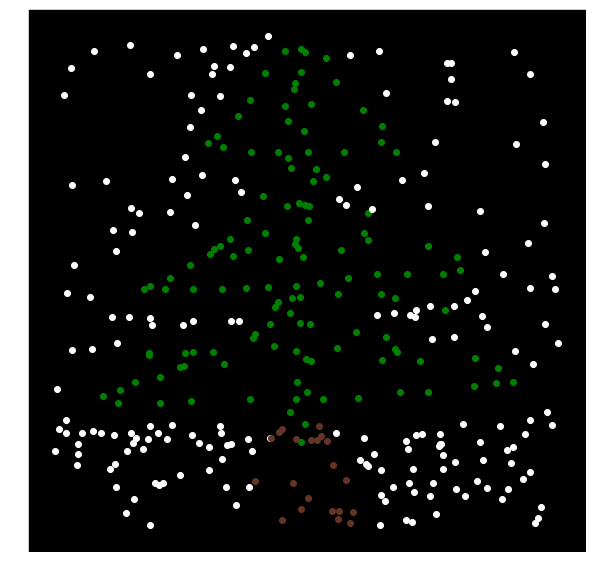

In [8]:
plt.figure(figsize=(10, 10))
plt.style.use('dark_background')
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plt.scatter(x1,y1,c='green')
plt.scatter(x2,y2,c='white')
plt.scatter(x3,y3,c='#623526')

In [9]:
from mlxtend.plotting import plot_decision_regions
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [10]:
X = df[['x', 'y']]
y = df['label']
X_train, X_valid, y_train, y_valid= train_test_split(X, y, random_state = 0)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [11]:
lgbm_params = {
    'learning_rate': 0.2,
    'num_leaves': 8,
    'boosting_type': 'gbdt',
    'reg_alpha': 1,
    'reg_lambda': 1,
    'objective': 'regression',
    'metric': 'mae',
}

In [12]:
# 上記のパラメータでモデルを学習する
model = lgb.train(
    lgbm_params, lgb_train,
    # モデルの評価用データを渡す
    valid_sets=lgb_eval,
    # 最大で 1000 ラウンドまで学習する
    num_boost_round=1000,
    # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
    early_stopping_rounds=10,
)

[1]	valid_0's l1: 0.476084
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l1: 0.437051
[3]	valid_0's l1: 0.406789
[4]	valid_0's l1: 0.37356
[5]	valid_0's l1: 0.34651
[6]	valid_0's l1: 0.330441
[7]	valid_0's l1: 0.316853
[8]	valid_0's l1: 0.300737
[9]	valid_0's l1: 0.291291
[10]	valid_0's l1: 0.281345
[11]	valid_0's l1: 0.273023
[12]	valid_0's l1: 0.268547
[13]	valid_0's l1: 0.261027
[14]	valid_0's l1: 0.254583
[15]	valid_0's l1: 0.251495
[16]	valid_0's l1: 0.247887
[17]	valid_0's l1: 0.246059
[18]	valid_0's l1: 0.244242
[19]	valid_0's l1: 0.243239
[20]	valid_0's l1: 0.242764
[21]	valid_0's l1: 0.241326
[22]	valid_0's l1: 0.241065
[23]	valid_0's l1: 0.240601
[24]	valid_0's l1: 0.239649
[25]	valid_0's l1: 0.239304
[26]	valid_0's l1: 0.238566
[27]	valid_0's l1: 0.238323
[28]	valid_0's l1: 0.238689
[29]	valid_0's l1: 0.238708
[30]	valid_0's l1: 0.240317
[31]	valid_0's l1: 0.238565
[32]	valid_0's l1: 0.237113
[33]	valid_0's l1: 0.236891
[34]	valid_0's l1: 0.2366

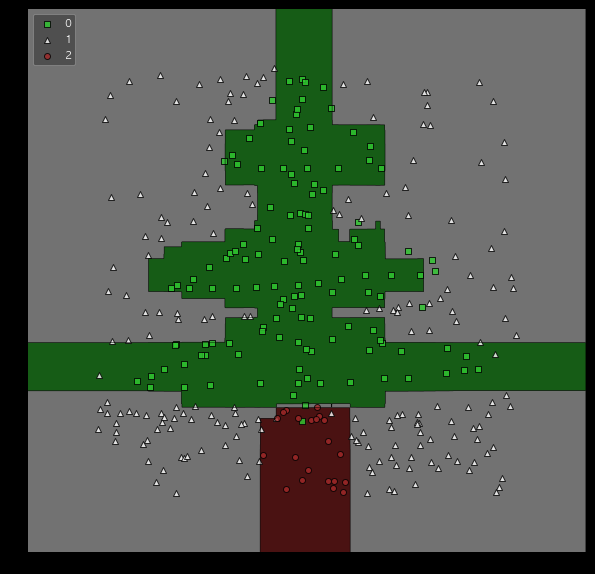

In [13]:
plt.figure(figsize=(10,10))
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plot_decision_regions(np.array(X), np.array(y), clf=model, res=0.02, legend=2, colors='limegreen,white,brown')